# Cálculo de caudal ecológico con python

## Imporación de librería para manejo de datos y lectua de datos de un excel
### Se us la fecha como índice de los datos

In [4]:
%matplotlib notebook
import pandas as pd
datos_caudales = pd.read_excel('datos.xlsx', index_col=0, parse_dates=True)

## Verificación de lectura de datos

In [5]:
datos_caudales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


In [6]:
datos_caudales.tail()

,Q ( m3/s)
Fecha,
2023-11-26,46.1025
2023-11-27,46.2102
2023-11-28,46.5784
2023-11-29,46.2152
2023-11-30,46.3406


## Representación de datos a través del tiempo

<IPython.core.display.Javascript object>


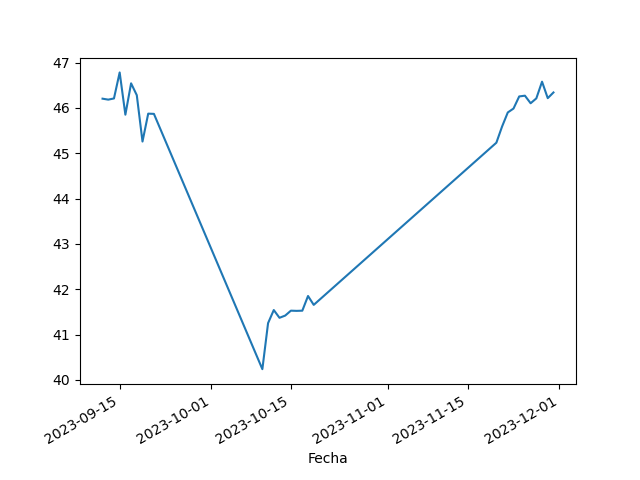

In [7]:
datos_caudales['Q   ( m3/s)'].plot()
figsize=(16,3)

## Extracción de la columna con caudales "Q(m3/s)"

In [8]:
solo_caudal = datos_caudales[['Q   ( m3/s)']]
solo_caudal.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


## Representación de los datos extraidos con un gráfico de puntos

<IPython.core.display.Javascript object>


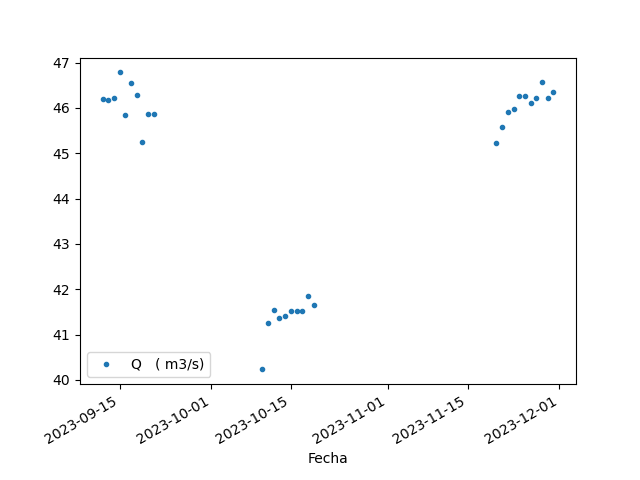

In [10]:
solo_caudal.plot(style=".")
figsize=(16,3)

## Creación y agrupación de los datos por meses

In [11]:
meses = {9: 'septiembre', 10: 'octubre', 11: 'noviembre'}
caudales_mensuales = solo_caudal.groupby(lambda m: m.month.map(meses))
caudales_mensuales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507
2023-10-10,40.2365
2023-10-11,41.2521
2023-10-12,41.5407
2023-10-13,41.3696


## Cálculos con los caudales
### Cálculo del máximo

In [12]:
caudales_mensuales.max()

,Q ( m3/s)
Fecha,
noviembre,46.5784
octubre,41.8505
septiembre,46.7825


### Cálculo del promedio

In [13]:
caudales_mensuales.mean()

,Q ( m3/s)
Fecha,
noviembre,46.061573
octubre,41.389850
septiembre,46.105050


### Cálculo de la mediana

In [14]:
caudales_mensuales.median()

,Q ( m3/s)
Fecha,
noviembre,46.21020
octubre,41.52450
septiembre,46.19305


### Cálculo del mínimo

In [15]:
caudales_mensuales.min()

,Q ( m3/s)
Fecha,
noviembre,45.2325
octubre,40.2365
septiembre,45.2584


## Gráfico de los cálculos, respecto a los meses

<IPython.core.display.Javascript object>


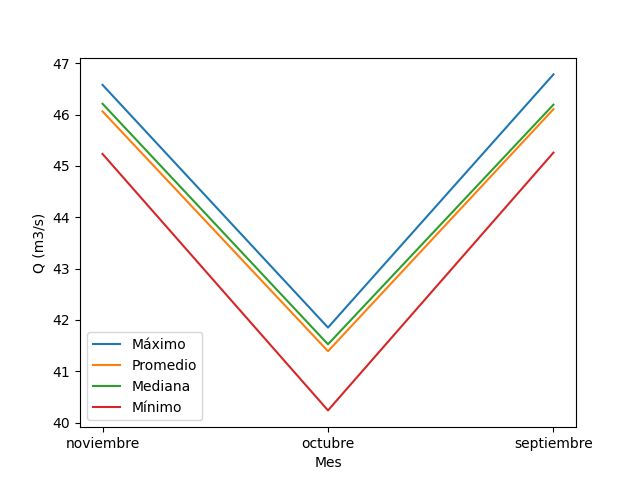

In [16]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max(),label='Máximo')
plt.plot(caudales_mensuales.mean(),label='Promedio')
plt.plot(caudales_mensuales.median(),label='Mediana')
plt.plot(caudales_mensuales.min(),label='Mínimo' )
plt.xlabel('Mes')
plt.ylabel('Q (m3/s)')
plt.legend()
plt.show()

### Aplicación de logaritmos para suavizar la curva
### No se aprecia la diferencia por los pocos datos

<IPython.core.display.Javascript object>


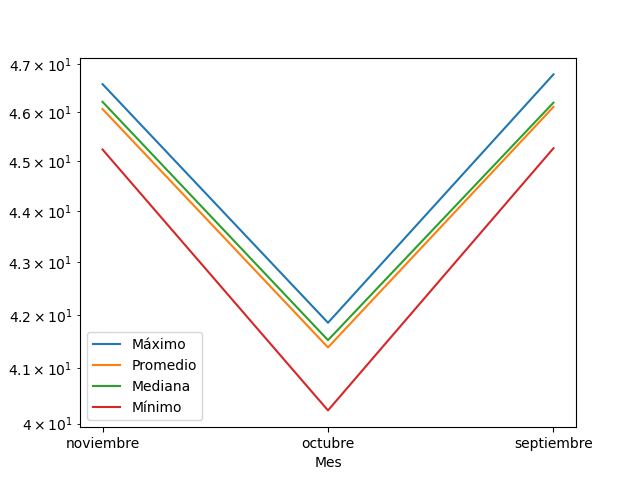

In [17]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max(),label='Máximo')
plt.plot(caudales_mensuales.mean(),label='Promedio')
plt.plot(caudales_mensuales.median(),label='Mediana')
plt.plot(caudales_mensuales.min(),label='Mínimo' )
plt.xlabel('Mes')
plt.legend()
plt.semilogy()
plt.show()

## Gráfico de cajas de los caudales por mes

<IPython.core.display.Javascript object>


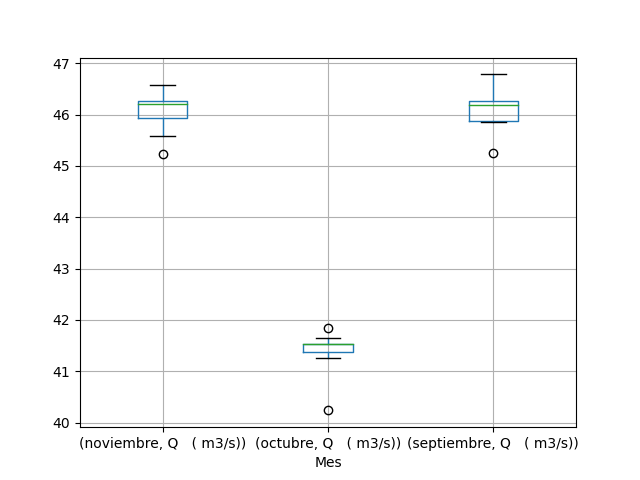

Text(0.5, 0, 'Mes')

In [18]:
caudales_mensuales.boxplot(subplots=False, return_type="dict")
plt.xlabel('Mes')

## Cálculo del caudal al 5%

In [19]:
caudales_mensuales.quantile(.05)

,Q ( m3/s)
Fecha,
noviembre,45.411050
octubre,40.693520
septiembre,45.524935


<IPython.core.display.Javascript object>


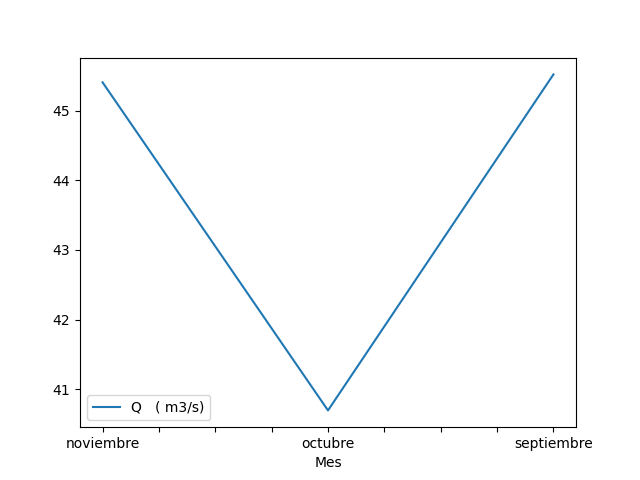

Text(0.5, 0, 'Mes')

In [20]:
caudales_mensuales.quantile(.05).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 10%

In [21]:
caudales_mensuales.quantile(0.1)

,Q ( m3/s)
Fecha,
noviembre,45.58960
octubre,41.15054
septiembre,45.79147


<IPython.core.display.Javascript object>


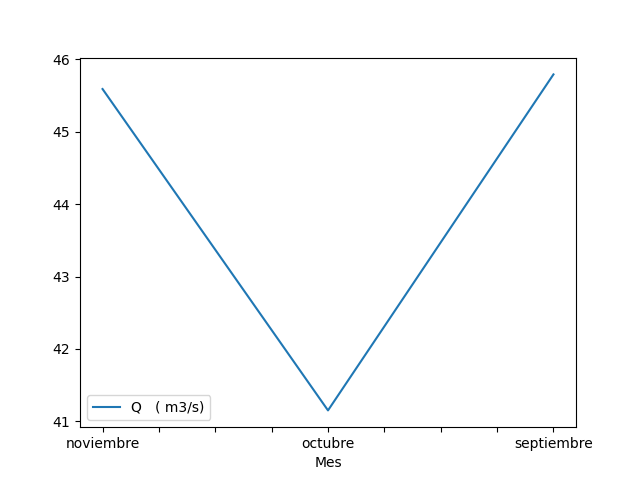

Text(0.5, 0, 'Mes')

In [22]:
caudales_mensuales.quantile(0.1).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 30%

In [23]:
caudales_mensuales.quantile(0.3)

,Q ( m3/s)
Fecha,
noviembre,45.98580
octubre,41.40383
septiembre,45.87176


<IPython.core.display.Javascript object>


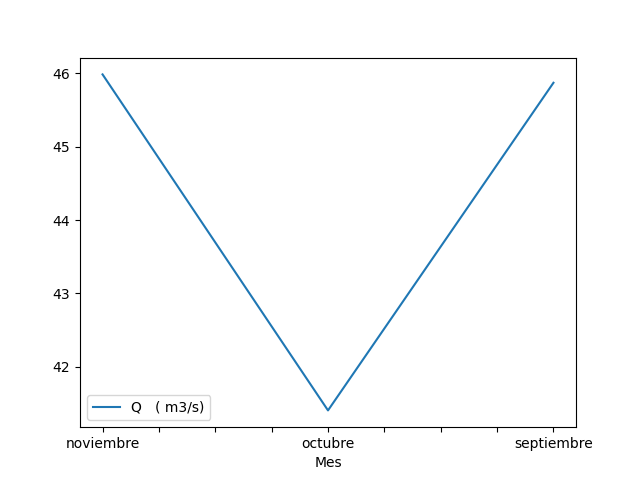

Text(0.5, 0, 'Mes')

In [24]:
caudales_mensuales.quantile(0.3).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 60%

In [25]:
caudales_mensuales.quantile(0.6)


,Q ( m3/s)
Fecha,
noviembre,46.21520
octubre,41.52666
septiembre,46.20556


<IPython.core.display.Javascript object>


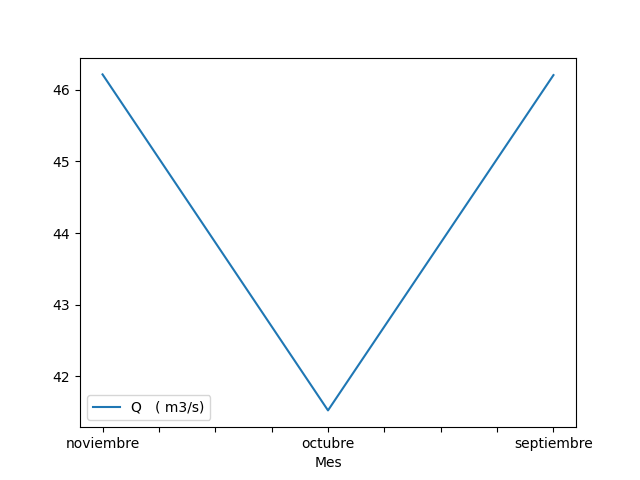

Text(0.5, 0, 'Mes')

In [26]:
caudales_mensuales.quantile(0.6).plot()
plt.xlabel('Mes')

In [149]:
caudales_mensuales_4 = solo_caudal.groupby(lambda m: m.month.map(meses)).head(4)
caudales_mensuales_4.drop('Month', axis=1, inplace=True)

C:\Users\carlos\AppData\Local\Temp\ipykernel_13996\2265977388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caudales_mensuales_4.drop('Month', axis=1, inplace=True)


In [150]:
caudales_mensuales_4.reset_index(inplace=True)
caudales_mensuales_4['Numero'] = range(1, len(caudales_mensuales_4) + 1)

caudales_mensuales_4.set_index('Numero', inplace=True)
caudales_mensuales_4['Fecha'] = caudales_mensuales_4['Fecha'].dt.strftime('%Y-%m-%d')

C:\Users\carlos\AppData\Local\Temp\ipykernel_13996\4261937316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caudales_mensuales_4['Numero'] = range(1, len(caudales_mensuales_4) + 1)
C:\Users\carlos\AppData\Local\Temp\ipykernel_13996\4261937316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caudales_mensuales_4['Fecha'] = caudales_mensuales_4['Fecha'].dt.strftime('%Y-%m-%d')


## Gráfico comparativos de caudal

### Caudal al 10%

<IPython.core.display.Javascript object>


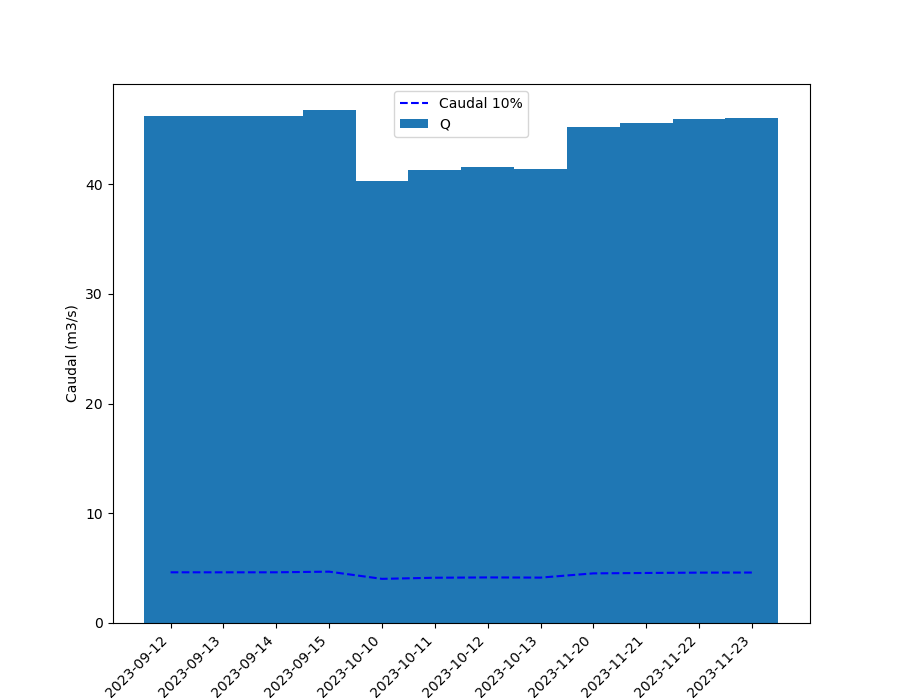

In [163]:
caudales_10 = caudales_mensuales_4.copy()
caudales_10.loc[:, 'Q   ( m3/s)'] *= 0.1
plt.figure(figsize=(9,7))
plt.bar(caudales_mensuales_4.index, caudales_mensuales_4['Q   ( m3/s)'],width=1, label='Q')
plt.xticks(caudales_mensuales_4.index, caudales_mensuales_4['Fecha'], rotation=45, ha='right')
plt.plot(caudales_10.index, caudales_10['Q   ( m3/s)'], marker='',linestyle='dashed', color='blue', label='Caudal 10%')
plt.ylabel('Caudal (m3/s)')
plt.legend()
plt.show()

### Caudal al 30%

<IPython.core.display.Javascript object>


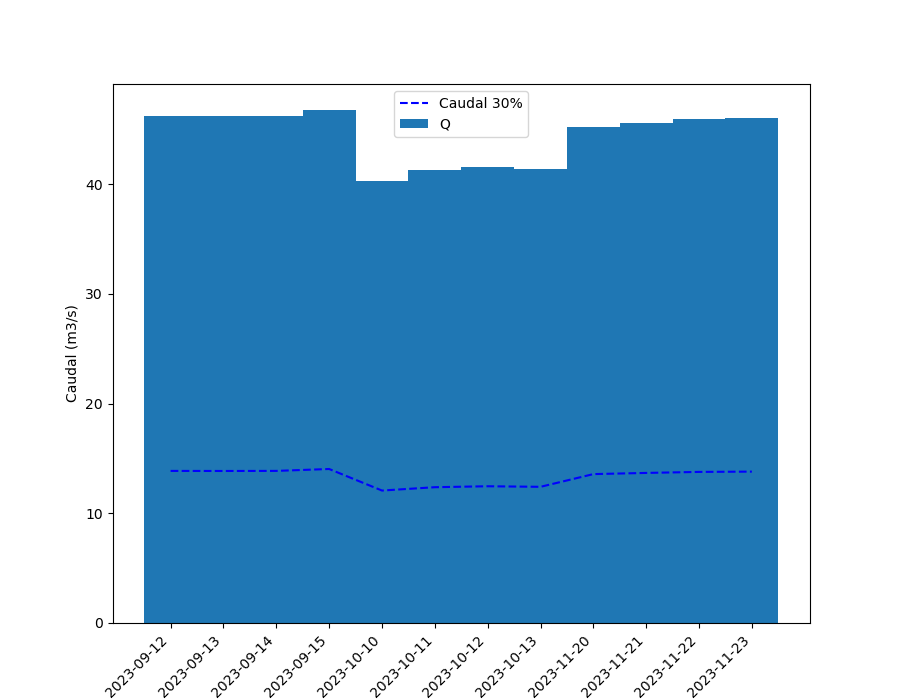

In [165]:
caudales_30 = caudales_mensuales_4.copy()
caudales_30.loc[:, 'Q   ( m3/s)'] *= 0.3
plt.figure(figsize=(9,7))
plt.bar(caudales_mensuales_4.index, caudales_mensuales_4['Q   ( m3/s)'],width=1, label='Q')
plt.xticks(caudales_mensuales_4.index, caudales_mensuales_4['Fecha'], rotation=45, ha='right')
plt.plot(caudales_30.index, caudales_30['Q   ( m3/s)'], marker='',linestyle='dashed', color='blue', label='Caudal 30%')
plt.ylabel('Caudal (m3/s)')
plt.legend()
plt.show()

### Caudal al 60%

<IPython.core.display.Javascript object>


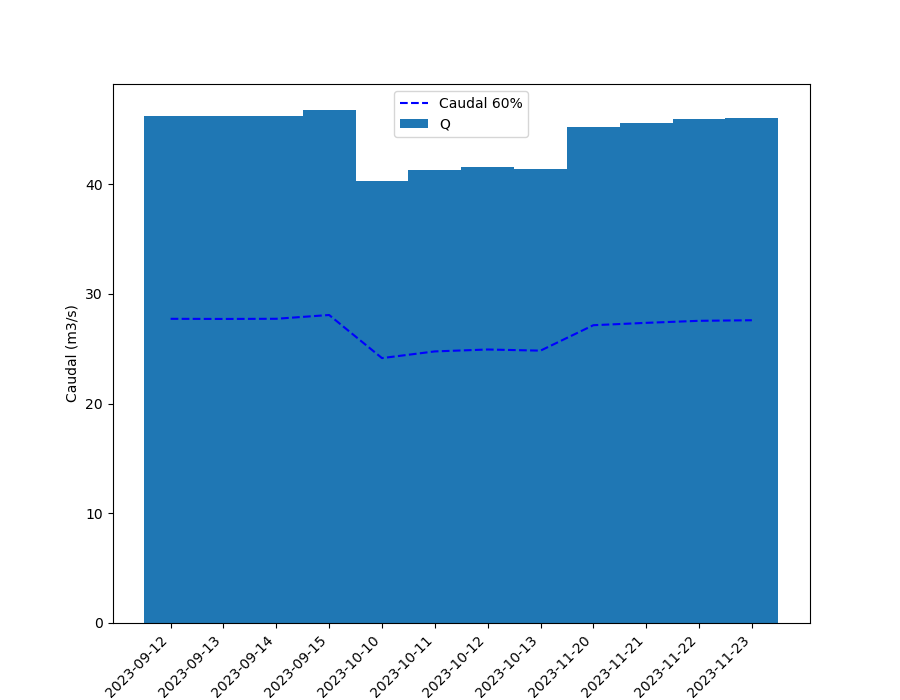

In [166]:
caudales_60 = caudales_mensuales_4.copy()
caudales_60.loc[:, 'Q   ( m3/s)'] *= 0.6
plt.figure(figsize=(9,7))
plt.bar(caudales_mensuales_4.index, caudales_mensuales_4['Q   ( m3/s)'],width=1, label='Q')
plt.xticks(caudales_mensuales_4.index, caudales_mensuales_4['Fecha'], rotation=45, ha='right')
plt.plot(caudales_60.index, caudales_60['Q   ( m3/s)'], marker='',linestyle='dashed', color='blue', label='Caudal 60%')
plt.ylabel('Caudal (m3/s)')
plt.legend()
plt.show()